In [1]:
import numpy as np
import sklearn.neighbors as nn
import matplotlib.pyplot as plt

In [2]:
with np.load("data/mnist/mnist.npz", allow_pickle=True) as f:
    xtrain, ytrain = f["x_train"], f["y_train"]
    xtest, ytest = f["x_test"], f["y_test"]
xtrain = xtrain[:10000]
ytrain = ytrain[:10000]
xtrain.shape, ytrain.shape

((10000, 28, 28), (10000,))

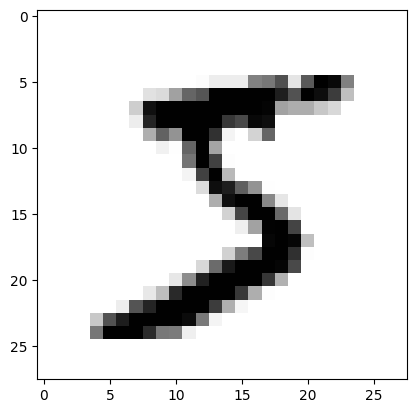

In [3]:
plt.imshow(xtrain[0], cmap=plt.cm.gray_r)

In [4]:
xtrain = xtrain.reshape(-1, 28*28)
xtest = xtest.reshape(-1,28*28)
model = nn.KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain, ytrain)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
ypredicted = model.predict(xtest)
score = model.score(xtest, ytest)
score

0.9463

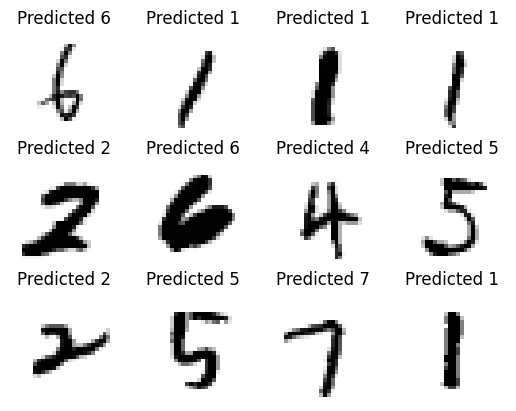

In [6]:
np.random.seed(0)
xtest = xtest.reshape(-1, 28, 28)
select = np.random.randint(xtest.shape[0], size=12)
for index, value in enumerate(select):
    plt.subplot(3, 4, index + 1)
    plt.axis("off")
    plt.imshow(xtest[value], cmap=plt.cm.gray_r)
    plt.title(f"Predicted {ypredicted[value]}")

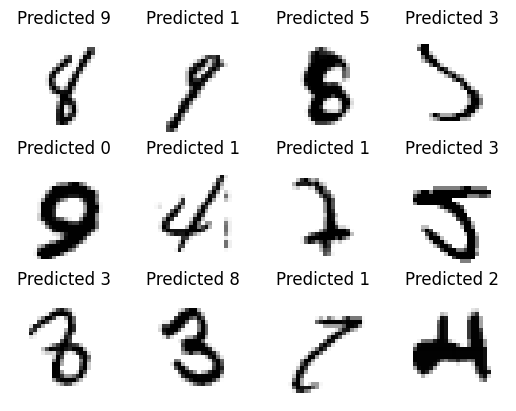

In [7]:
errors = ytest != ypredicted
xerrors = xtest[errors]
yerrors = ypredicted[errors]
select = np.random.randint(xerrors.shape[0], size=12)
for index, value in enumerate(select):
    plt.subplot(3, 4, index + 1)
    plt.axis("off")
    plt.imshow(xerrors[value], cmap=plt.cm.gray_r)
    plt.title(f"Predicted {yerrors[value]}")